# Binary Classification with a Bank Churn Dataset 1

## 1. ライブラリ

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression

## 2. データの取入れ

In [2]:
# Binary Classification with a Bank Churn Dataset のデータセット
dir_path = '/kaggle/input/playground-series-s4e1/'
test = pd.read_csv(dir_path + 'test.csv')
train = pd.read_csv(dir_path + 'train.csv')
samp_sub = pd.read_csv(dir_path + 'sample_submission.csv')

# Bank Customer Churn Prediction のデータセット
original = pd.read_csv('/kaggle/input/bank-customer-churn/Customer-Churn-Records.csv')
original = original.rename({'RowNumber':'id'}, axis = 1)

## 3. 前処理
### 3.1. データの数

In [3]:
print('lenth of dataset')
print('train'.ljust(10), ':  ', len(train))
print('test'.ljust(10), ':  ', len(test))
print('original'.ljust(10), ':  ', len(original))

lenth of dataset
train      :   165034
test       :   110023
original   :   10000


### 3.2. 変数の概要
* Customer ID:
A unique identifier for each customer<br>
顧客ID<br>
* Surname:
The customer's surname or last name<br>
名前
* Credit Score:
A numerical value representing the customer's credit score<br>
信用 (350 ~ 850)<br>
* Geography:
The country where the customer resides (France, Spain or Germany)<br>
居住国 ('France', 'Germany', 'Spain')<br>
* Gender:
The customer's gender (Male or Female)<br>
性別 ('Female', 'Male')<br>
* Age:
The customer's age.<br>
年齢 (18 ~ 92)<br>
* Tenure:
The number of years the customer has been with the bank<br>
銀行に在籍する年数 (0 ~ 10)<br>
* Balance:
The customer's account balance<br>
口座残高 (0 ~ 250898.09)<br>
* NumOfProducts:
The number of bank products the customer uses (e.g., savings account, credit card)<br>
使用する銀行商品数 (1, 2, 3, 4)<br>
* HasCrCard:
Whether the customer has a credit card (1 = yes, 0 = no)<br>
クレジットカードの所有<br>
* IsActiveMember:
Whether the customer is an active member (1 = yes, 0 = no)<br>
口座をよく使うか<br>
* EstimatedSalary:
The estimated salary of the customer<br>
推定給与 (11.58 ~ 199992.48)<br>
* Exited:
Whether the customer has churned (1 = yes, 0 = no)<br>
口座解除したか

#### 3.2.1. データの欠損

In [4]:
print(' '*22, 'train'.ljust(10), 'test'.ljust(10), 'original')
for col in test.columns:
    print(col.ljust(20), ': Nan =', train[col].isnull().sum(), '  ',
                         'Nan =', test[col].isnull().sum(), '  ',
                         'Nan =', original[col].isnull().sum())

                       train      test       original
id                   : Nan = 0    Nan = 0    Nan = 0
CustomerId           : Nan = 0    Nan = 0    Nan = 0
Surname              : Nan = 0    Nan = 0    Nan = 0
CreditScore          : Nan = 0    Nan = 0    Nan = 0
Geography            : Nan = 0    Nan = 0    Nan = 0
Gender               : Nan = 0    Nan = 0    Nan = 0
Age                  : Nan = 0    Nan = 0    Nan = 0
Tenure               : Nan = 0    Nan = 0    Nan = 0
Balance              : Nan = 0    Nan = 0    Nan = 0
NumOfProducts        : Nan = 0    Nan = 0    Nan = 0
HasCrCard            : Nan = 0    Nan = 0    Nan = 0
IsActiveMember       : Nan = 0    Nan = 0    Nan = 0
EstimatedSalary      : Nan = 0    Nan = 0    Nan = 0


=> データに欠損がない

#### 3.2.2. CreditScore

train.CreditScore    :  350 ~ 850
test.CreditScore     :  350 ~ 850
original.CreditScore :  350 ~ 850


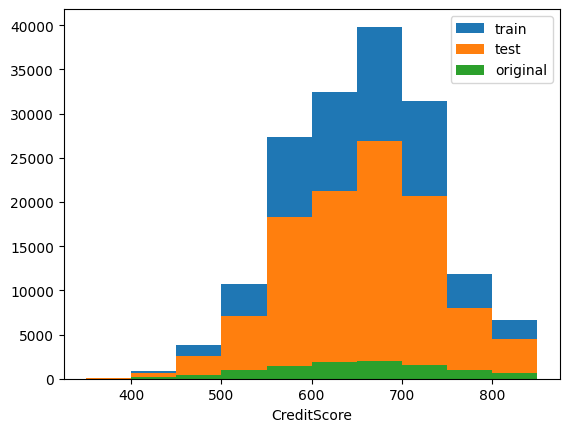

In [5]:
print('train.CreditScore'.ljust(20),    ': ', train.CreditScore.min(),    '~', train.CreditScore.max())
print('test.CreditScore'.ljust(20),     ': ', test.CreditScore.min(),     '~', test.CreditScore.max())
print('original.CreditScore'.ljust(20), ': ', original.CreditScore.min(), '~', original.CreditScore.max())
fig = plt.figure()
plt.hist(train.CreditScore, label='train')
plt.hist(test.CreditScore, label='test')
plt.hist(original.CreditScore, label='original')
plt.xlabel('CreditScore')
plt.legend()
plt.show()

#### 3.2.3. Geography

train.Geography      :  ['France' 'Germany' 'Spain']
test.Geography       :  ['France' 'Germany' 'Spain']
original.Geography   :  ['France' 'Germany' 'Spain']


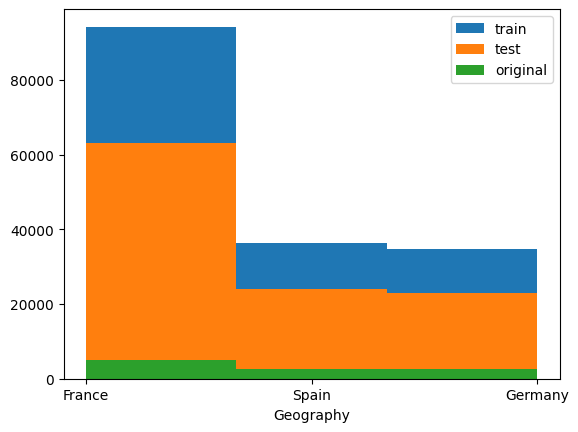

In [6]:
print('train.Geography'.ljust(20),    ': ', np.sort(train.Geography.unique()))
print('test.Geography'.ljust(20),     ': ', np.sort(test.Geography.unique()))
print('original.Geography'.ljust(20), ': ', np.sort(original.Geography.unique()))
fig = plt.figure()
plt.hist(train.Geography, label='train', bins=3)
plt.hist(test.Geography, label='test', bins=3)
plt.hist(original.Geography, label='original', bins=3)
plt.xlabel('Geography')
plt.legend()
plt.show()

#### 3.2.4. Gender

train.Gender         :  ['Female' 'Male']
test.Gender          :  ['Female' 'Male']
original.Gender      :  ['Female' 'Male']


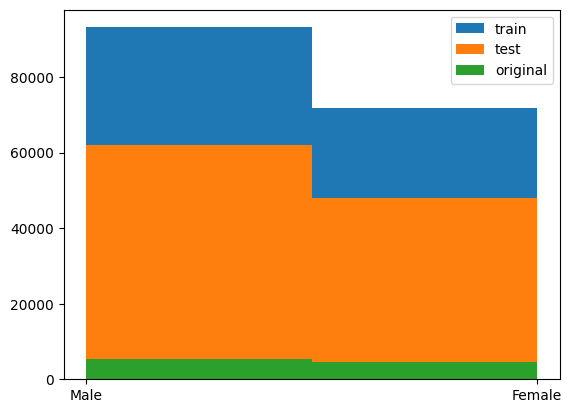

In [7]:
print('train.Gender'.ljust(20),    ': ', np.sort(train.Gender.unique()))
print('test.Gender'.ljust(20),     ': ', np.sort(test.Gender.unique()))
print('original.Gender'.ljust(20), ': ', np.sort(original.Gender.unique()))
fig = plt.figure()
plt.hist(train.Gender, label='train', bins=2)
plt.hist(test.Gender, label='test', bins=2)
plt.hist(original.Gender, label='original', bins=2)
#plt.xlabel('Gender')
plt.legend()
plt.show()

#### 3.2.5. Age

train.Age            :  18.0 ~ 92.0
test.Age             :  18.0 ~ 92.0
original.Age         :  18 ~ 92


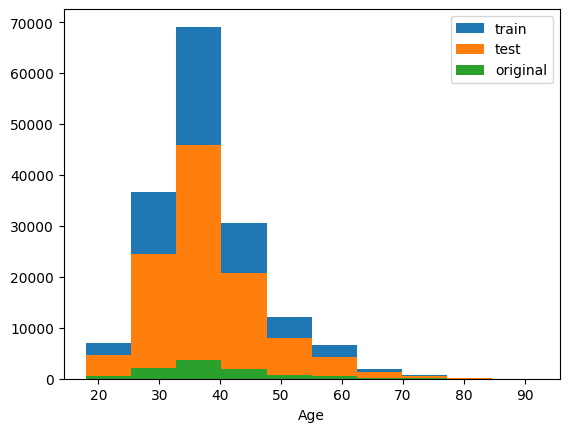

In [8]:
print('train.Age'.ljust(20),    ': ', train.Age.min(),    '~', train.Age.max())
print('test.Age'.ljust(20),     ': ', test.Age.min(),     '~', test.Age.max())
print('original.Age'.ljust(20), ': ', original.Age.min(), '~', original.Age.max())
fig = plt.figure()
plt.hist(train.Age, label='train')
plt.hist(test.Age, label='test')
plt.hist(original.Age, label='original')
plt.xlabel('Age')
plt.legend()
plt.show()

#### 3.2.6. Tenure

train.Tenure         :  0 ~ 10
test.Tenure          :  0 ~ 10
original.Tenure      :  0 ~ 10


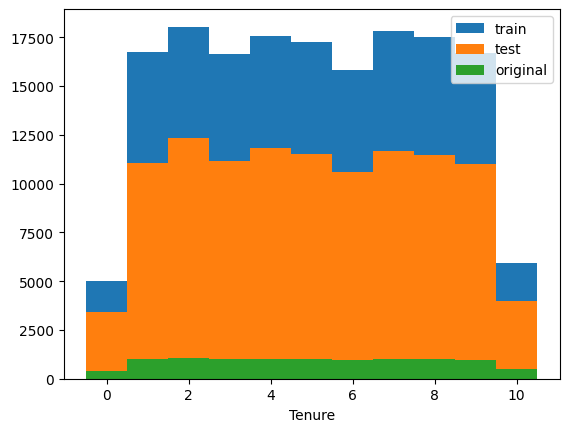

In [9]:
print('train.Tenure'.ljust(20),    ': ', train.Tenure.min(),    '~', train.Tenure.max())
print('test.Tenure'.ljust(20),     ': ', test.Tenure.min(),     '~', test.Tenure.max())
print('original.Tenure'.ljust(20), ': ', original.Tenure.min(), '~', original.Tenure.max())
fig = plt.figure()
plt.hist(train.Tenure, label='train', bins=11, range=(-0.5, 10.5))
plt.hist(test.Tenure, label='test', bins=11, range=(-0.5, 10.5))
plt.hist(original.Tenure, label='original', bins=11, range=(-0.5, 10.5))
plt.xlabel('Tenure')
plt.legend()
plt.show()

#### 3.2.7. Balance

train.Balance        :  0.0 ~ 250898.09
test.Balance         :  0.0 ~ 250898.09
original.Balance     :  0.0 ~ 250898.09


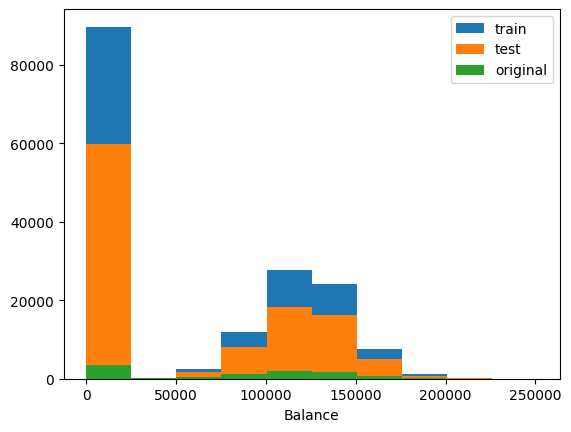

In [10]:
print('train.Balance'.ljust(20),    ': ', train.Balance.min(),    '~', train.Balance.max())
print('test.Balance'.ljust(20),     ': ', test.Balance.min(),     '~', test.Balance.max())
print('original.Balance'.ljust(20), ': ', original.Balance.min(), '~', original.Balance.max())
fig = plt.figure()
plt.hist(train.Balance, label='train')
plt.hist(test.Balance, label='test')
plt.hist(original.Balance, label='original')
plt.xlabel('Balance')
plt.legend()
plt.show()

#### 3.2.8. NumOfProducts

train.NumOfProducts       :  [1 2 3 4]
test.NumOfProducts        :  [1 2 3 4]
original.NumOfProducts    :  [1 2 3 4]


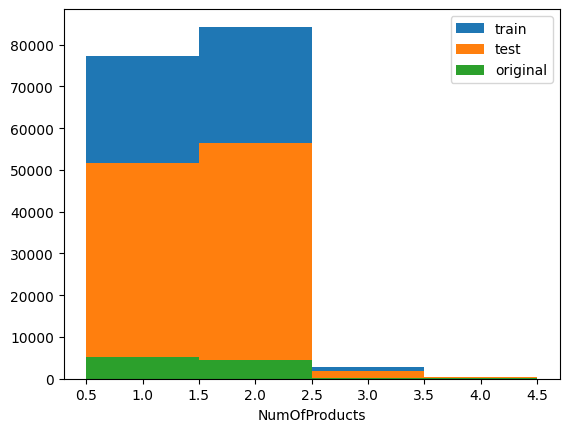

In [11]:
print('train.NumOfProducts'.ljust(25),    ': ', np.sort(train.NumOfProducts.unique()))
print('test.NumOfProducts'.ljust(25),     ': ', np.sort(test.NumOfProducts.unique()))
print('original.NumOfProducts'.ljust(25), ': ', np.sort(original.NumOfProducts.unique()))
fig = plt.figure()
plt.hist(train.NumOfProducts, label='train', bins=4, range=(0.5, 4.5))
plt.hist(test.NumOfProducts, label='test', bins=4, range=(0.5, 4.5))
plt.hist(original.NumOfProducts, label='original', bins=4, range=(0.5, 4.5))
plt.xlabel('NumOfProducts')
plt.legend()
plt.show()

#### 3.2.9. HasCrCard

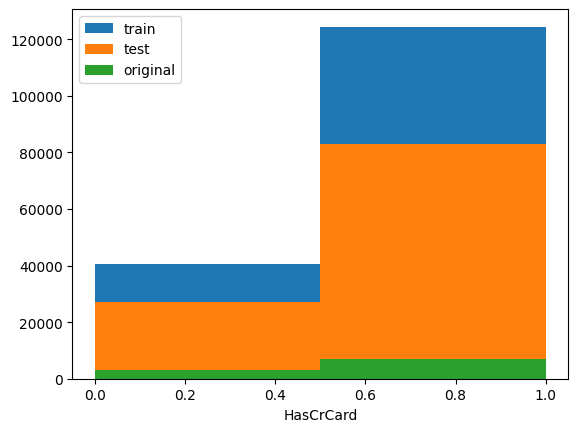

In [12]:
fig = plt.figure()
plt.hist(train.HasCrCard, label='train', bins=2)
plt.hist(test.HasCrCard, label='test', bins=2)
plt.hist(original.HasCrCard, label='original', bins=2)
plt.xlabel('HasCrCard')
plt.legend()
plt.show()

#### 3.2.10. IsActiveMember

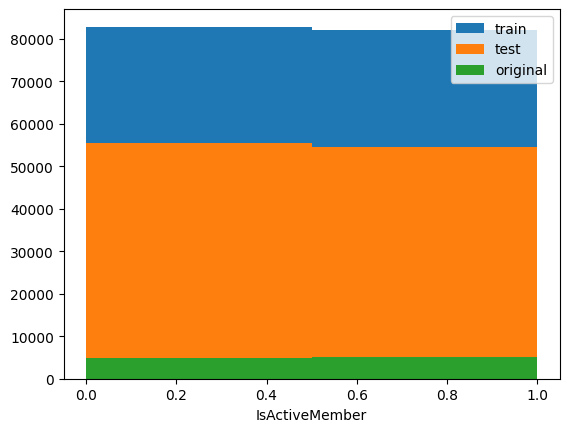

In [13]:
fig = plt.figure()
plt.hist(train.IsActiveMember, label='train', bins=2)
plt.hist(test.IsActiveMember, label='test', bins=2)
plt.hist(original.IsActiveMember, label='original', bins=2)
plt.xlabel('IsActiveMember')
plt.legend()
plt.show()

#### 3.2.11. EstimatedSalary

train.EstimatedSalary     :  11.58 ~ 199992.48
test.EstimatedSalary      :  11.58 ~ 199992.48
original.EstimatedSalary  :  11.58 ~ 199992.48


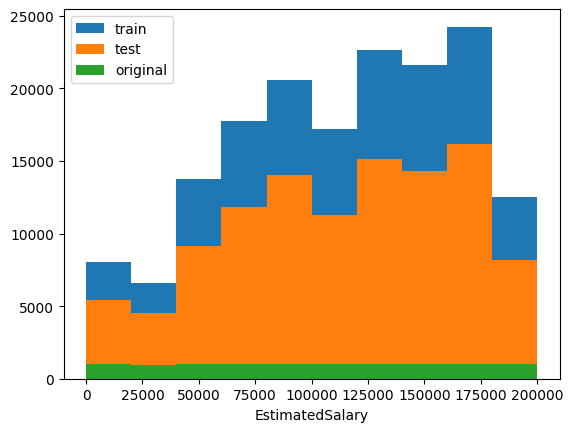

In [14]:
print('train.EstimatedSalary'.ljust(25),    ': ', train.EstimatedSalary.min(),    '~', train.EstimatedSalary.max())
print('test.EstimatedSalary'.ljust(25),     ': ', test.EstimatedSalary.min(),     '~', test.EstimatedSalary.max())
print('original.EstimatedSalary'.ljust(25), ': ', original.EstimatedSalary.min(), '~', original.EstimatedSalary.max())
fig = plt.figure()
plt.hist(train.EstimatedSalary, label='train')
plt.hist(test.EstimatedSalary, label='test')
plt.hist(original.EstimatedSalary, label='original')
plt.xlabel('EstimatedSalary')
plt.legend()
plt.show()

### 3.3. データの型変更
CustomerIdとSurnameは予測に役立たないものなので、無視する。<br>
型変更するものはGeographyとGenderだけ。

In [15]:
Geography_cat = {'France'  : 0,
                 'Spain'   : 1,
                 'Germany' : 2}
Gender_cat = {'Female' : 0,
              'Male'   : 1}
for data in [train, test, original]:
    data.Geography = data.Geography.map(Geography_cat)
    data.Gender = data.Gender.map(Gender_cat)

### 3.4. データ分布の可視化

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated a

<Figure size 640x480 with 0 Axes>

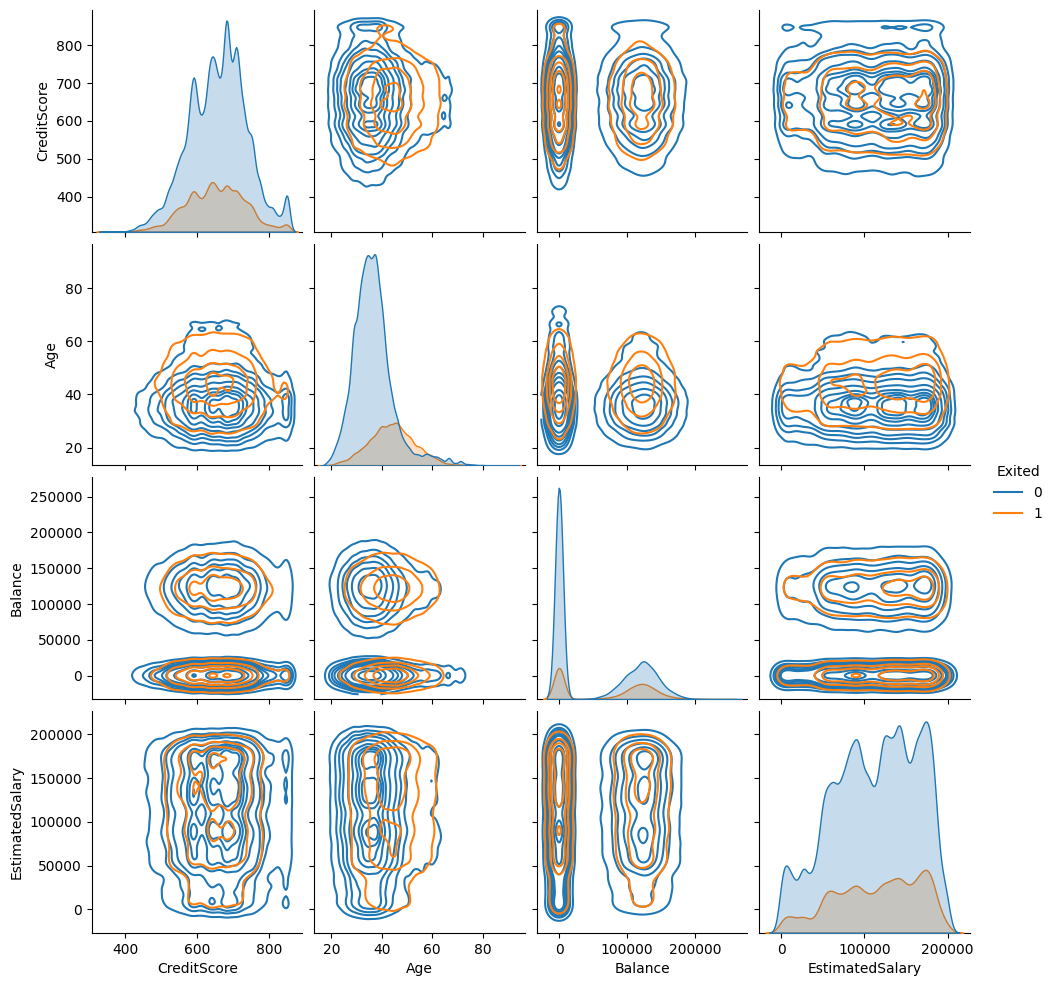

In [16]:
fig = plt.figure()
features_for_pairplot = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'Exited']
sns.pairplot(train[features_for_pairplot], hue='Exited', kind='kde')
plt.show()

Ageの分布より、これが予測に役立つと考えられる。<br>
Balanceの分布より、Balance=0とBalance>0の2つの部分に分割して予測すべきだと考えられる。

### 3.5. 特徴量の重要度
#### 3.5.1. フィルタ法

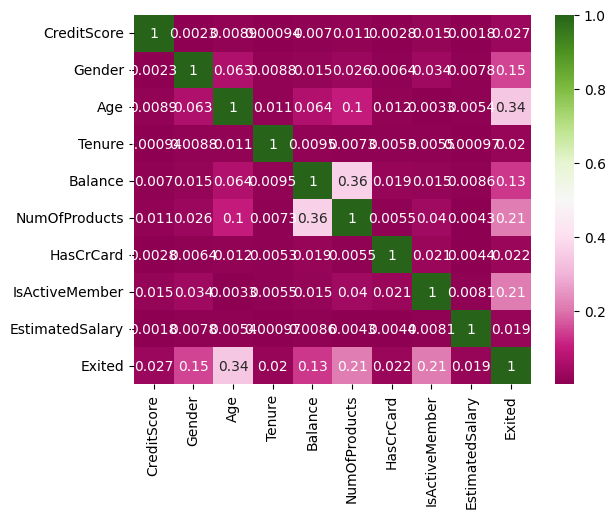

In [17]:
features_for_correlation = ['CreditScore', 'Gender', 'Age', 'Tenure',
                            'Balance', 'NumOfProducts', 'HasCrCard',
                            'IsActiveMember', 'EstimatedSalary', 'Exited']
cor = train[features_for_correlation].corr()
fig = plt.figure()
sns.heatmap(abs(cor), annot=True, cmap = 'PiYG')
plt.show()

相関係数の絶対値が0.1以上の特徴量の重要度の順番は<br>
Age > NumOfProducts = EstimatedSalary > Gender > Balance である。<br>
また、BalanceとNumOfProductsの間の相関係数が0.36であり、偏相関係数<br>
(0.13-0.36\*0.21)/((1-0.36^2)^0.5 \* (1-0.21^2)^0.5) = 0.060<br>
より、BalanceとExitedの間の関係が疑似相関である可能性が高い。


#### 3.5.2. ラッパー法

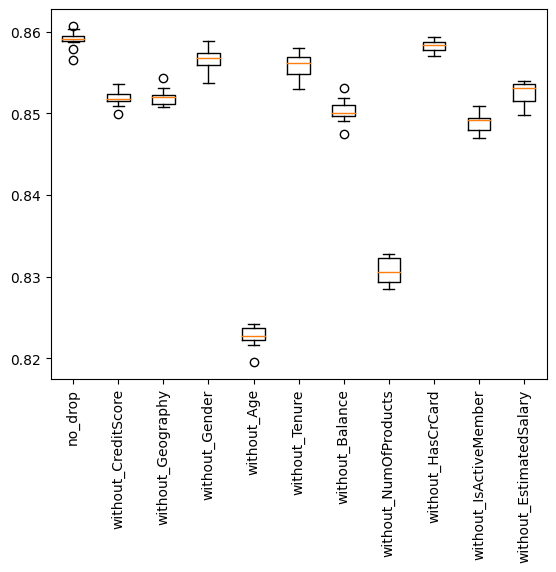

In [18]:
features_for_wrapper = ['CreditScore', 'Geography', 'Gender', 'Age',
                        'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
                        'IsActiveMember', 'EstimatedSalary']
scores = [[]]
for i in range(10):
    tra, val = train_test_split(train, test_size=0.3)
    rfc = RandomForestClassifier(n_jobs=3)
    rfc.fit(tra[features_for_wrapper], tra.Exited)
    scores[-1].append(rfc.score(val[features_for_wrapper], val.Exited))
for fea in features_for_wrapper:
    dropped_features_for_wrapper = features_for_wrapper.copy()
    dropped_features_for_wrapper.remove(fea)
    scores.append([])
    for i in range(10):
        tra, val = train_test_split(train, test_size=0.3)
        rfc = RandomForestClassifier(n_jobs=3)
        rfc.fit(tra[dropped_features_for_wrapper], tra.Exited)
        scores[-1].append(rfc.score(val[dropped_features_for_wrapper], val.Exited))
fig, ax = plt.subplots()
ax.boxplot(scores)
ax.set_xticklabels(['no_drop']+['without_'+f for f in features_for_wrapper], rotation=90)
plt.show()

#### 3.5.3. 埋め込み法

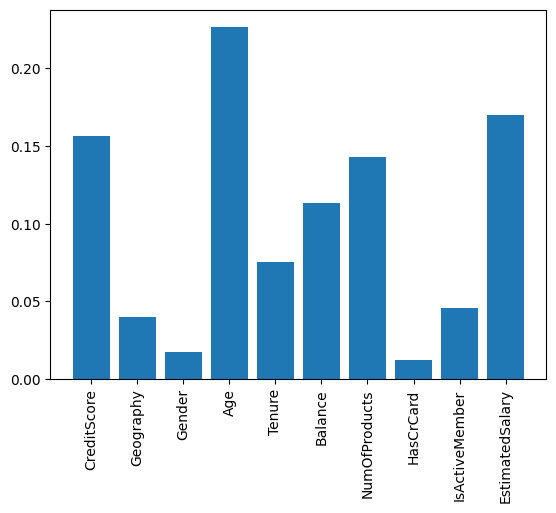

In [19]:
features_for_embedding = ['CreditScore', 'Geography', 'Gender', 'Age',
                          'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
                          'IsActiveMember', 'EstimatedSalary']
rfc = RandomForestClassifier(n_estimators=1000, n_jobs=3)
rfc.fit(train[features_for_embedding], train.Exited)
fig = plt.figure()
plt.bar(features_for_embedding, rfc.feature_importances_)
plt.xticks(rotation=90)
plt.show()

## 4. 特徴量作成
### 4.1. 各国の口座解除率

In [20]:
geographical_exit_rate_cat = {}
for geo in range(3):
    geographical_exit_rate_cat[geo] = len(train[(train.Geography==geo)&(train.Exited==1)])/len(train[(train.Geography==geo)])
for data in [train, test, original]:
    data['Geographical_Exit_Rate'] = data.Geography.map(geographical_exit_rate_cat)

### 4.2. CustomerId
#### 4.2.1. それぞれのデータセットの中での使用回数

In [21]:
CustomerId_used_times_cat = {}
for ci in train.CustomerId.unique():
    CustomerId_used_times_cat[ci] = len(train[train.CustomerId==ci])
train['CustomerId_used_times'] = train.CustomerId.map(CustomerId_used_times_cat)

CustomerId_used_times_cat = {}
for ci in test.CustomerId.unique():
    CustomerId_used_times_cat[ci] = len(test[test.CustomerId==ci])
test['CustomerId_used_times'] = test.CustomerId.map(CustomerId_used_times_cat)

#### 4.2.2. 全データセットの中での使用回数

In [22]:
total_CustomerId_used_times_cat = {}
for ci in set(train.CustomerId.unique()).union(set(test.CustomerId.unique())):
    total_CustomerId_used_times_cat[ci] = len(train[train.CustomerId==ci]) + len(test[test.CustomerId==ci])
for data in [train, test]:
    data['total_CustomerId_used_times'] = data.CustomerId.map(total_CustomerId_used_times_cat)

#### 4.2.3. 各CustomerIdの口座解除率

In [23]:
exit_rate_on_CustomerId_cat = {}
total_exit_rate = train.Exited.sum()/len(train)
for ci in train.CustomerId.unique():
    exit_rate_on_CustomerId_cat[ci] = (len(train[(train.CustomerId==ci)&(train.Exited==1)])+total_exit_rate)/(len(train[train.CustomerId==ci])+1)
for ci in set(test.CustomerId.unique())-set(train.CustomerId.unique()):
    exit_rate_on_CustomerId_cat[ci] = total_exit_rate
for data in [train, test]:
    data['exit_rate_on_CustomerId'] = data.CustomerId.map(exit_rate_on_CustomerId_cat)

### 4.3. 口座残高があるかどうか

In [24]:
for data in [train, test]:
    data['Have_Balance'] = (data.Balance > 0)*1

### 4.4. 特徴量の検証
#### 4.4.1. ラッパー法

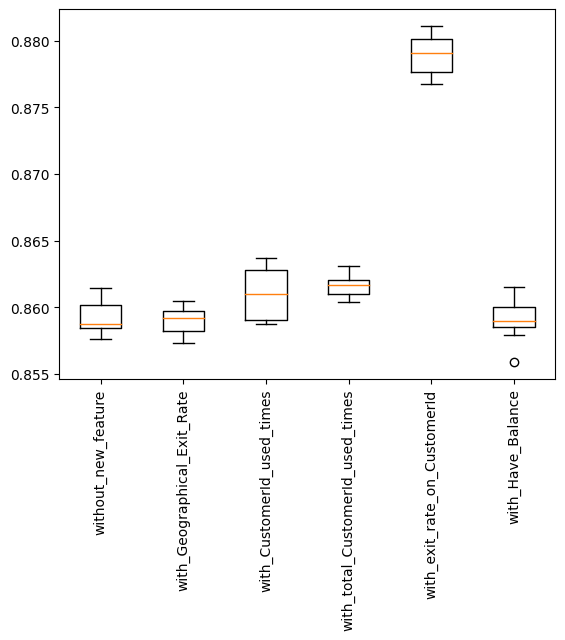

In [25]:
features_for_validation = ['CreditScore', 'Geography', 'Gender', 'Age',
                           'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
                           'IsActiveMember', 'EstimatedSalary']
new_features = ['Geographical_Exit_Rate', 'CustomerId_used_times', 'total_CustomerId_used_times', 'exit_rate_on_CustomerId', 'Have_Balance']
scores = [[]]
for i in range(10):
    tra, val = train_test_split(train, test_size=0.3)
    rfc = RandomForestClassifier(n_jobs=3)
    rfc.fit(tra[features_for_validation], tra.Exited)
    scores[-1].append(rfc.score(val[features_for_validation], val.Exited))
for fea in new_features:
    scores.append([])
    for i in range(10):
        tra, val = train_test_split(train, test_size=0.3)
        rfc = RandomForestClassifier(n_jobs=3)
        rfc.fit(tra[features_for_validation + [fea]], tra.Exited)
        scores[-1].append(rfc.score(val[features_for_validation + [fea]], val.Exited))
fig, ax = plt.subplots()
ax.boxplot(scores)
ax.set_xticklabels(['without_new_feature']+['with_'+f for f in new_features], rotation=90)
plt.show()

#### 4.4.2. 埋め込み法

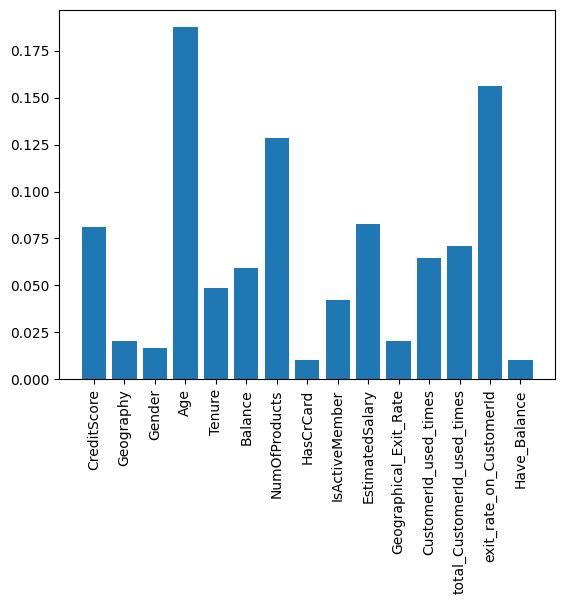

In [26]:
total_features = ['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
                  'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
                  'EstimatedSalary', 'Geographical_Exit_Rate',
                  'CustomerId_used_times', 'total_CustomerId_used_times',
                  'exit_rate_on_CustomerId', 'Have_Balance']
rfc = RandomForestClassifier(n_estimators=1000, n_jobs=3)
rfc.fit(train[total_features], train.Exited)
fig = plt.figure()
plt.bar(total_features, rfc.feature_importances_)
plt.xticks(rotation=90)
plt.show()

## 5. 各種モデルによる予測
### 5.1. RandomForestClassifier

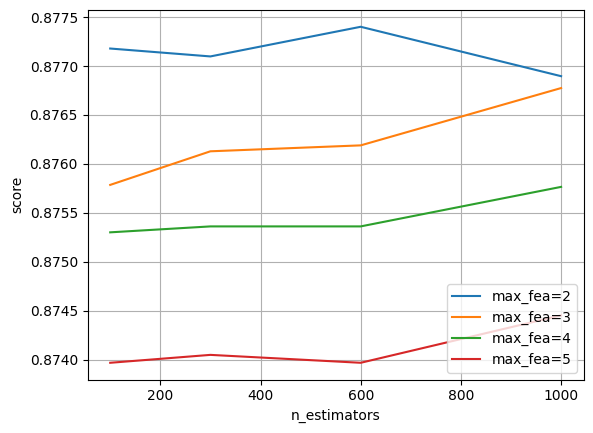

In [27]:
features_for_rfc = ['CreditScore', 'Geography', 'Age', 'Tenure', 'Balance',
                    'NumOfProducts', 'IsActiveMember', 'EstimatedSalary',
                    'total_CustomerId_used_times', 'exit_rate_on_CustomerId']
tra, val = train_test_split(train, test_size = 0.3)
max_features = [2, 3, 4, 5]
n_estimators = [100, 300, 600, 1000]
scores = []
for m in max_features:
    scores.append([])
    for n in n_estimators:
        rfc = RandomForestClassifier(max_features=m, n_estimators=n, random_state = 0, n_jobs=3)
        rfc.fit(tra[features_for_rfc], tra.Exited)
        scores[-1].append(rfc.score(val[features_for_rfc], val.Exited))
fig = plt.figure()
for i in range(len(max_features)):
    plt.plot(n_estimators, scores[i], label='max_fea='+str(max_features[i]))
plt.xlabel('n_estimators')
plt.ylabel('score')
plt.legend()
plt.grid()
plt.show()

### 5.2. KNeighborsClassifier

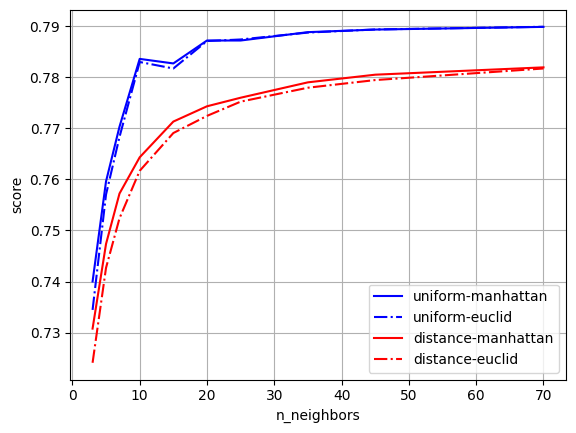

In [28]:
features_for_knc = ['CreditScore', 'Geography', 'Age', 'Tenure', 'Balance',
                    'NumOfProducts', 'IsActiveMember', 'EstimatedSalary',
                    'total_CustomerId_used_times', 'exit_rate_on_CustomerId']
tra, val = train_test_split(train, test_size = 0.3)
n_neighbors = [3, 5, 7, 10, 15, 20, 25, 35, 45, 70]
scores = []
for w in ['uniform', 'distance']:
    scores.append([])
    for p in [1, 2]:
        scores[-1].append([])
        for n in n_neighbors:
            knc = KNeighborsClassifier(weights=w, p=p, n_neighbors=n, n_jobs=3)
            knc.fit(tra[features_for_knc], tra.Exited)
            scores[-1][-1].append(knc.score(val[features_for_knc], val.Exited))
fig = plt.figure()
plt.plot(n_neighbors, scores[0][0], c='blue', ls='-', label='uniform-manhattan')
plt.plot(n_neighbors, scores[0][1], c='blue', ls='-.', label='uniform-euclid')
plt.plot(n_neighbors, scores[1][0], c='red', ls='-', label='distance-manhattan')
plt.plot(n_neighbors, scores[1][1], c='red', ls='-.', label='distance-euclid')
plt.legend()
plt.grid()
plt.xlabel('n_neighbors')
plt.ylabel('score')
plt.show()

### 5.3. MLPClassifier

In [29]:
features_for_mlp = ['CreditScore', 'Geography', 'Age', 'Tenure', 'Balance',
                    'NumOfProducts', 'IsActiveMember', 'EstimatedSalary',
                    'total_CustomerId_used_times', 'exit_rate_on_CustomerId']
tra, val = train_test_split(train, test_size = 0.3)
mlp = MLPClassifier([300, 300, 300])
mlp.fit(tra[features_for_mlp], tra.Exited)
mlp.score(val[features_for_mlp], val.Exited)

0.7894205328108905

### 5.4. LogisticRegression

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

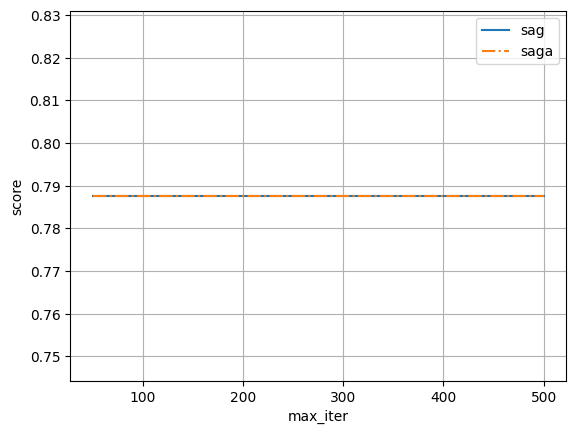

In [30]:
features_for_lgr = ['CreditScore', 'Geography', 'Age', 'Tenure', 'Balance',
                    'NumOfProducts', 'IsActiveMember', 'EstimatedSalary',
                    'total_CustomerId_used_times', 'exit_rate_on_CustomerId']
tra, val = train_test_split(train, test_size = 0.3)
solver = ['sag', 'saga']
max_iter = [50, 100, 300, 500]
scores = []
for s in solver:
    scores.append([])
    for i in max_iter:
        lgr = LogisticRegression(solver=s, max_iter=i, n_jobs=3)
        lgr.fit(tra[features_for_lgr], tra.Exited)
        scores[-1].append(lgr.score(val[features_for_lgr], val.Exited))
fig = plt.figure()
plt.plot(max_iter, scores[0], label=solver[0], ls='-')
plt.plot(max_iter, scores[1], label=solver[1], ls='-.')
plt.xlabel('max_iter')
plt.ylabel('score')
plt.legend()
plt.grid()
plt.show()